In [1]:
import os
os.environ['PATH'] += ':ffmpeg-3.4.2-64bit-static'

# Setup

In [2]:
exp_directory = 'results'
agent_name = 'DeepQAgent'
game_name = 'SpaceInvaders'
render_mode='rgb_array'

### Global Modules

In [3]:
import os
import datetime
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
from gym.wrappers import Monitor

### Local Modules

In [4]:
import base
from src.agents import DeepQAgent, A3CAgent
from src.util import BaseCallback, JupyterCallback
from src.environment.atari import build_atari_environment

/usr/local/anaconda5/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/usr/local/anaconda5/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


## Constants

In [5]:
agents = {
    DeepQAgent.__name__: DeepQAgent,
    A3CAgent.__name__: A3CAgent,
}

#### Output Directory

In [6]:
# setup the experiment directory
now = datetime.datetime.today().strftime('%Y-%m-%d_%H-%M')
exp_directory = '{}/{}/{}/{}'.format(exp_directory, game_name, agent_name, now)
if not os.path.exists(exp_directory):
    os.makedirs(exp_directory)
exp_directory

'results/SpaceInvaders/DeepQAgent/2018-04-16_01-56'

In [7]:
plot_dir = '{}/plots'.format(exp_directory)
if not os.path.exists(plot_dir):
    os.makedirs(plot_dir)
plot_dir

'results/SpaceInvaders/DeepQAgent/2018-04-16_01-56/plots'

# Environment

In [8]:
env = build_atari_environment(game_name)
env = Monitor(env, '{}/monitor'.format(exp_directory), force=True)

In [9]:
env.observation_space

Box(84, 84, 4)

In [10]:
env.action_space

Discrete(6)

# Agent

In [11]:
agent = agents[agent_name](env, render_mode=render_mode)
agent

DeepQAgent(
    env=<Monitor<FrameStackEnv<ClipRewardEnv<PenalizeDeathEnv<DownsampleEnv<FireResetEnv<MaxFrameskipEnv<NoopResetEnv<TimeLimit<AtariEnv<SpaceInvadersNoFrameskip-v4>>>>>>>>>>>,
    render_mode='rgb_array'
    replay_memory_size=1000000,
    discount_factor=0.99,
    update_frequency=4,
    optimizer=<keras.optimizers.Adam object at 0x2b8cc9a9e208>,
    exploration_rate=AnnealingVariable(initial_value=1.0, final_value=0.1, steps=1000000),
    loss=huber_loss,
    target_update_freq=10000,
    dueling_network=True
)

In [12]:
# write some info about the agent to disk
with open('{}/agent.py'.format(exp_directory), 'w') as agent_file:
    agent_file.write(repr(agent))

## Initial

In [13]:
initial = agent.play()
initial = pd.Series(initial)
initial

100%|██████████| 100/100 [02:48<00:00,  1.69s/game]


0     -3.0
1      2.0
2      1.0
3      0.0
4     15.0
5      2.0
6      0.0
7      7.0
8      6.0
9      5.0
10    14.0
11     5.0
12    15.0
13     6.0
14     5.0
15    10.0
16     3.0
17    13.0
18     5.0
19     6.0
20     6.0
21     5.0
22     4.0
23    14.0
24     4.0
25     5.0
26     9.0
27     9.0
28     3.0
29    13.0
      ... 
70     9.0
71     5.0
72    -2.0
73     8.0
74     9.0
75     6.0
76     6.0
77     6.0
78    19.0
79     1.0
80     7.0
81     3.0
82    -1.0
83    18.0
84    13.0
85     1.0
86    10.0
87    12.0
88     3.0
89    17.0
90     0.0
91     9.0
92     6.0
93     0.0
94     2.0
95     3.0
96     2.0
97    11.0
98     3.0
99    -3.0
Length: 100, dtype: float64

In [14]:
initial.to_csv('{}/initial.csv'.format(exp_directory))

In [15]:
initial.describe()

count    100.000000
mean       6.890000
std        5.635198
min       -3.000000
25%        2.750000
50%        6.000000
75%       10.250000
max       23.000000
dtype: float64

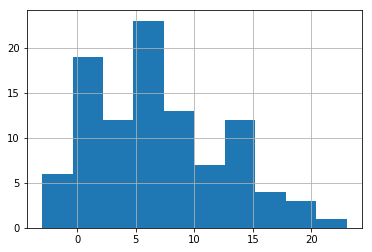

In [16]:
initial.hist()
plt.savefig('{}/initial.pdf'.format(plot_dir))

## Training

In [17]:
agent.observe()

50443frame [00:57, 883.06frame/s]                        


In [18]:
callback = BaseCallback()

In [19]:
agent.train(callback=callback)

 97%|█████████▋| 9677373/10000000 [17:14:13<35:02, 153.47frame/s, loss=1.29, score=68]   

KeyboardInterrupt: 

 97%|█████████▋| 9677373/10000000 [17:14:29<35:02, 153.47frame/s, loss=1.29, score=68]

In [20]:
# save the training results
scores = pd.Series(callback.scores)
scores.to_csv('{}/scores.csv'.format(exp_directory))
losses = pd.Series(callback.losses)
losses.to_csv('{}/losses.csv'.format(exp_directory))

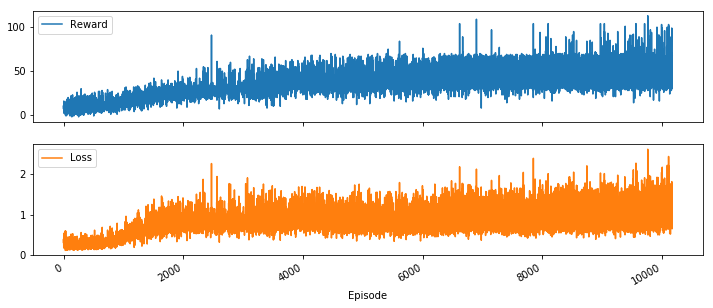

In [21]:
train = pd.concat([scores, losses], axis=1)
train.columns = ['Reward', 'Loss']
train.index.name = 'Episode'
_ = train.plot(figsize=(12, 5), subplots=True)
plt.savefig('{}/training.pdf'.format(plot_dir))

## Final

In [23]:
final = agent.play()
final = pd.Series(final)
final


100%|██████████| 100/100 [05:55<00:00,  3.55s/game]


0     33.0
1     33.0
2     67.0
3     32.0
4     31.0
5     66.0
6     68.0
7     72.0
8     60.0
9     28.0
10    33.0
11    70.0
12    30.0
13    49.0
14    32.0
15    61.0
16    23.0
17    67.0
18    31.0
19    68.0
20    64.0
21    32.0
22    61.0
23    85.0
24    58.0
25    65.0
26    29.0
27    69.0
28    23.0
29    56.0
      ... 
70    68.0
71    68.0
72    65.0
73    32.0
74    59.0
75    66.0
76    34.0
77    60.0
78    66.0
79    63.0
80    67.0
81    34.0
82    34.0
83    32.0
84    70.0
85    34.0
86    33.0
87    31.0
88    34.0
89    68.0
90    32.0
91    43.0
92    84.0
93    32.0
94    32.0
95    32.0
96    67.0
97    53.0
98    66.0
99    49.0
Length: 100, dtype: float64

In [24]:
final.to_csv('{}/final.csv'.format(exp_directory))

In [25]:
final.describe()

count    100.000000
mean      52.790000
std       17.785078
min       23.000000
25%       33.000000
50%       60.500000
75%       68.000000
max       90.000000
dtype: float64

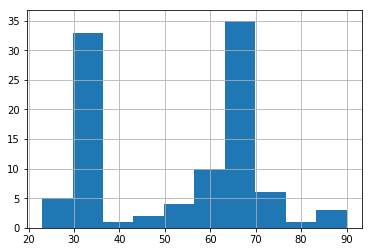

In [26]:
final.hist()
plt.savefig('{}/final.pdf'.format(plot_dir))

## Saving Weights

In [27]:
agent.model.save_weights('{}/weights.h5'.format(exp_directory), overwrite=True)